In [6]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [7]:
max_features = 20000
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

pad_size_dict = {}
for max_len in [10, 50, 200, 400]:
    x_train = pad_sequences(x_train, maxlen=max_len)
    x_test = pad_sequences(x_test, maxlen=max_len)
    pad_size_dict[max_len] = (x_train, x_test)

In [8]:
model_layers_dict = {}
for k, v in pad_size_dict.items():
    model_layers_dict[k] = [
        Embedding(max_features, 8),
        SimpleRNN(16, input_shape=(max_features,k), kernel_regularizer='l2'),
        Dropout(0.1),
        Dense(1, activation='sigmoid'),
    ]

models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

10
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 8)           160000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16)                400       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,417
Trainable params: 160,417
Non-trainable params: 0
_________________________________________________________________
50
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedd

In [9]:
history_dict = {}
for k, model in tqdm(models.items()):
    x_train, x_test = pad_size_dict[k]
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/5
782/782 [==============================] - 7s 8ms/step - loss: 0.6542 - accuracy: 0.6300 - val_loss: 0.5605 - val_accuracy: 0.7175
Epoch 2/5
782/782 [==============================] - 6s 7ms/step - loss: 0.4952 - accuracy: 0.7708 - val_loss: 0.5453 - val_accuracy: 0.7234
Epoch 3/5
782/782 [==============================] - 6s 7ms/step - loss: 0.4241 - accuracy: 0.8146 - val_loss: 0.5766 - val_accuracy: 0.7190
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 0.3650 - accuracy: 0.8488 - val_loss: 0.6086 - val_accuracy: 0.7130
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.3086 - accuracy: 0.8786 - val_loss: 0.6797 - val_accuracy: 0.7004


 25%|██▌       | 1/4 [00:32<01:36, 32.12s/it]

Epoch 1/5
782/782 [==============================] - 18s 22ms/step - loss: 0.6692 - accuracy: 0.6158 - val_loss: 0.5681 - val_accuracy: 0.7115
Epoch 2/5
782/782 [==============================] - 17s 22ms/step - loss: 0.4992 - accuracy: 0.7698 - val_loss: 0.5525 - val_accuracy: 0.7222
Epoch 3/5
782/782 [==============================] - 18s 23ms/step - loss: 0.4096 - accuracy: 0.8273 - val_loss: 0.5898 - val_accuracy: 0.7184
Epoch 4/5
782/782 [==============================] - 17s 22ms/step - loss: 0.3313 - accuracy: 0.8684 - val_loss: 0.6417 - val_accuracy: 0.7032
Epoch 5/5
782/782 [==============================] - 17s 22ms/step - loss: 0.2627 - accuracy: 0.9034 - val_loss: 0.7033 - val_accuracy: 0.6940


 50%|█████     | 2/4 [01:59<02:09, 64.82s/it]

Epoch 1/5
782/782 [==============================] - 56s 71ms/step - loss: 0.6497 - accuracy: 0.6493 - val_loss: 0.5625 - val_accuracy: 0.7164
Epoch 2/5
782/782 [==============================] - 55s 70ms/step - loss: 0.4931 - accuracy: 0.7713 - val_loss: 0.5450 - val_accuracy: 0.7295
Epoch 3/5
782/782 [==============================] - 51s 65ms/step - loss: 0.4302 - accuracy: 0.8118 - val_loss: 0.5655 - val_accuracy: 0.7242
Epoch 4/5
782/782 [==============================] - 53s 67ms/step - loss: 0.3898 - accuracy: 0.8358 - val_loss: 0.5737 - val_accuracy: 0.7174
Epoch 5/5
782/782 [==============================] - 53s 68ms/step - loss: 0.3537 - accuracy: 0.8526 - val_loss: 0.6230 - val_accuracy: 0.7153


 75%|███████▌  | 3/4 [06:27<02:37, 157.52s/it]

Epoch 1/5
782/782 [==============================] - 88s 112ms/step - loss: 0.7012 - accuracy: 0.5868 - val_loss: 0.6177 - val_accuracy: 0.6704
Epoch 2/5
782/782 [==============================] - 90s 115ms/step - loss: 0.5267 - accuracy: 0.7512 - val_loss: 0.5513 - val_accuracy: 0.7246
Epoch 3/5
782/782 [==============================] - 90s 116ms/step - loss: 0.4193 - accuracy: 0.8228 - val_loss: 0.5846 - val_accuracy: 0.7216
Epoch 4/5
782/782 [==============================] - 88s 113ms/step - loss: 0.3322 - accuracy: 0.8711 - val_loss: 0.6515 - val_accuracy: 0.7073
Epoch 5/5
782/782 [==============================] - 79s 101ms/step - loss: 0.5468 - accuracy: 0.7752 - val_loss: 0.7361 - val_accuracy: 0.6269


100%|██████████| 4/4 [13:43<00:00, 205.80s/it]


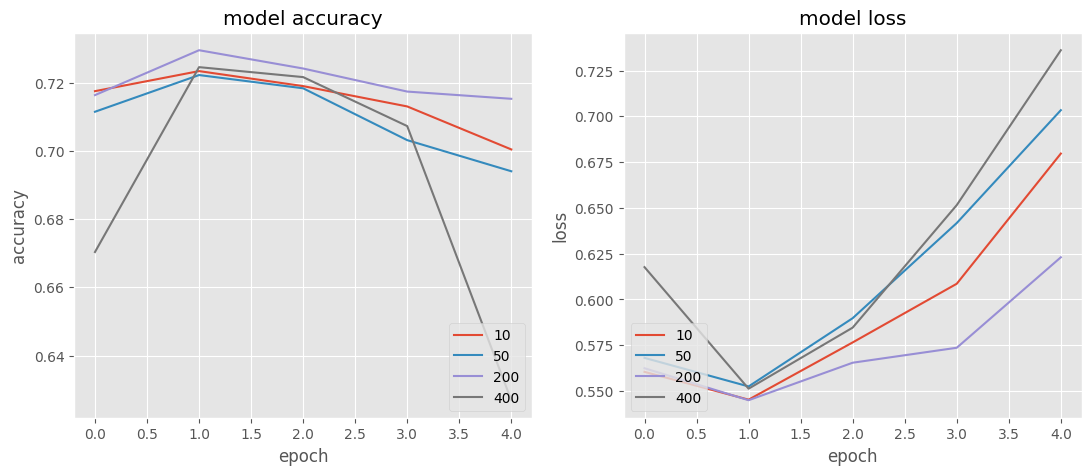

In [10]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=k)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=k)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join([str(x) for x in models.keys()]) + '.png');